<a href="https://colab.research.google.com/github/Sonu2252/Computer_Vision/blob/main/CIFAR_10_CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 792 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=ba5678e73d7660615877107b4b25b46a87086886612d0f10828e5260683bcc56
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_test.shape

(10000, 1)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
X_train.shape[1:]

(32, 32, 3)

In [16]:
class_names = ["aeroplane", "car", "bird", "automobile", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_random_examples(x, y, p):
  indices = np.random.choice(range(x.shape[0]), 10, replace=False)

  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize=(10, 5))
  for i in range(10):
    plt.subplot(2, 5, 1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color = col)
  plt.show()



In [17]:
import matplotlib.pyplot as plt

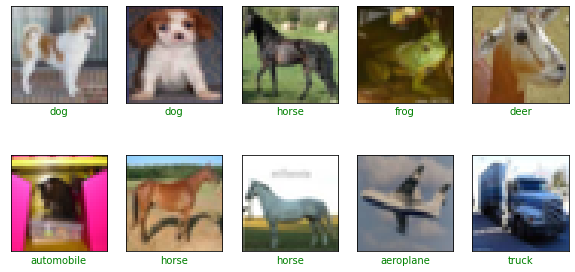

In [18]:
show_random_examples(X_train, y_train, y_train)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


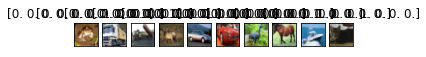

In [19]:
fig = plt.figure(figsize=(5, 2))
for i in range(10):
  ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(X_train[i]))
  ax.set_title(y_train[i])

In [20]:
model_1 = Sequential([
              Conv2D(32, (3, 3), activation="relu", input_shape=X_train.shape[1:], padding="same"),
              BatchNormalization(),
              Conv2D(48, (3, 3), activation="relu"),
              MaxPooling2D((2, 2)),
              Dropout(0.5),
              Flatten(),
              Dense(500, activation="relu"),
              Dense(10, activation="softmax")
])

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 48)        13872     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 48)        0         
                                                                 
 flatten (Flatten)           (None, 10800)             0

In [22]:
from tensorflow.keras.utils import plot_model

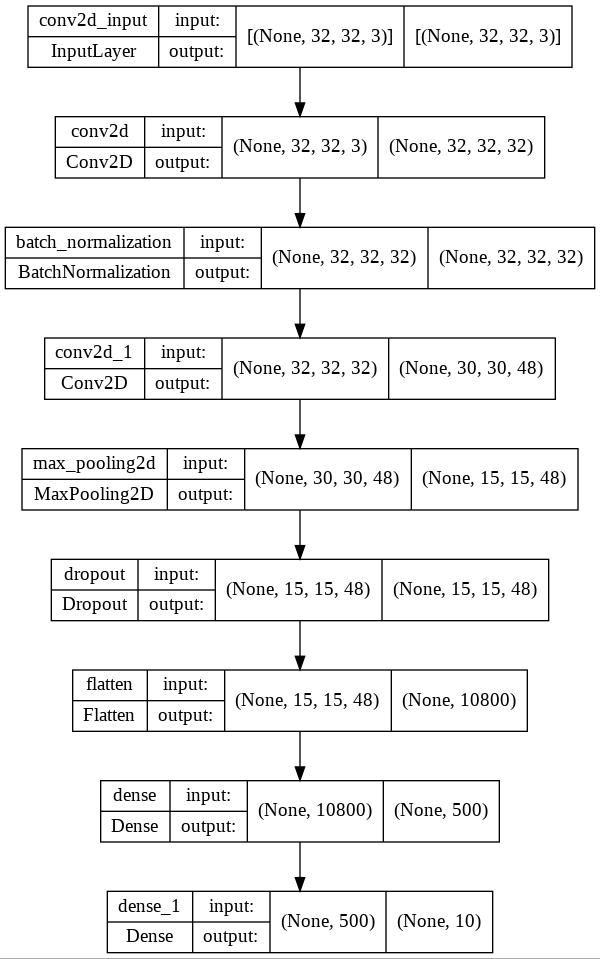

In [23]:
plot_model(model_1, 'model_1.jpg', show_shapes=True)

In [24]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [29]:
history_1 = model_1.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test/255., y_test))

Epoch 1/15
391/391 [==============================] - 5s 13ms/step - loss: 0.4568 - accuracy: 0.8366 - val_loss: 5.9184 - val_accuracy: 0.1000
Epoch 2/15
391/391 [==============================] - 5s 12ms/step - loss: 0.4210 - accuracy: 0.8504 - val_loss: 6.8707 - val_accuracy: 0.1000
Epoch 3/15
391/391 [==============================] - 5s 12ms/step - loss: 0.3948 - accuracy: 0.8584 - val_loss: 7.7679 - val_accuracy: 0.1000
Epoch 4/15
391/391 [==============================] - 5s 12ms/step - loss: 0.3663 - accuracy: 0.8681 - val_loss: 7.3148 - val_accuracy: 0.0999
Epoch 5/15
391/391 [==============================] - 5s 13ms/step - loss: 0.3362 - accuracy: 0.8807 - val_loss: 9.1310 - val_accuracy: 0.1000
Epoch 6/15
391/391 [==============================] - 5s 12ms/step - loss: 0.3150 - accuracy: 0.8875 - val_loss: 8.5362 - val_accuracy: 0.1000
Epoch 7/15
391/391 [==============================] - 5s 13ms/step - loss: 0.2953 - accuracy: 0.8934 - val_loss: 6.9293 - val_accuracy: 0.1000

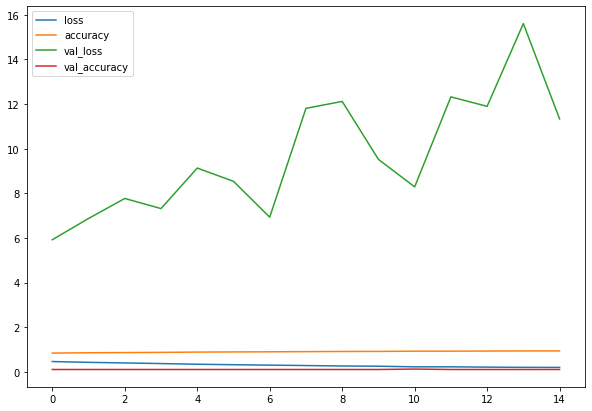

In [30]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [33]:
def plot_loss_curves(history):
 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()


  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

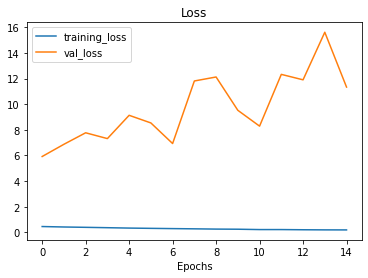

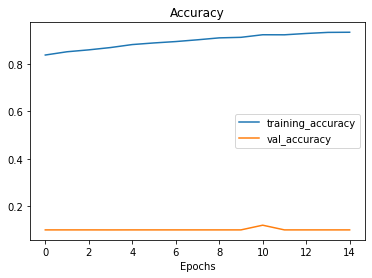

In [34]:
plot_loss_curves(history_1)

In [40]:
loss, accuracy = model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2936 - accuracy: 0.7035


In [41]:
print(f"Accuracy: {accuracy*100}")

Accuracy: 70.3499972820282


In [42]:
image = X_train[5]

In [44]:
from pylab import *

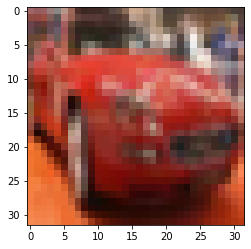

In [45]:
imshow(image)

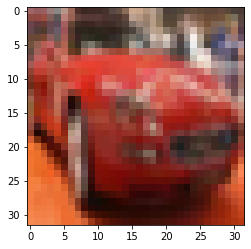

In [47]:
plt.imshow(np.squeeze(image))

In [50]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

In [53]:
predicted = model_1.predict([image])
p = argmax(predicted)
print('Predicted: {}'.format(argmax(predicted)))

Predicted: 1


In [55]:
print(f"The object shown in the pricture is:", class_names[p])

The object shown in the pricture is: car
